# Next Word Prediction:
## Strange Case

### Importing The Required Libraries:

In [2]:
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import pickle
import numpy as np
import os

In [3]:
"""
    Dataset: http://www.gutenberg.org/cache/epub/5200/pg5200.txt
    Remove all the unnecessary data and label it as Metamorphosis-clean.
    The starting and ending lines should be as follows.

"""


file = open("C:/Users/Admin/Downloads/The_Strange_Case_of_Dr. Jekyll_and_ Mr. Hy _by_Robert_Louis_Stevenson.txt", "r", encoding = "utf8")
lines = []

for i in file:
    lines.append(i)
    
print("The First Line: ", lines[0])
print("The Last Line: ", lines[-1])

The First Line:  STORY OF THE DOOR

The Last Line:  



### Cleaning the data:

In [4]:
data = ""

for i in lines:
    data = ' '. join(lines)
    
data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '')
data[:360]

'STORY OF THE DOOR  Mr. Utterson the lawyer was a man of a rugged countenance that was never lighted by a smile; cold, scanty and embarrassed in discourse; backward in sentiment; lean, long, dusty, dreary and yet somehow lovable. At friendly meetings, and when the wine was to his taste, something eminently human beaconed from his eye; something indeed which n'

In [5]:
import string

translator = str.maketrans(string.punctuation, ' '*len(string.punctuation)) #map punctuation to space
new_data = data.translate(translator)

new_data[:500]

'STORY OF THE DOOR  Mr  Utterson the lawyer was a man of a rugged countenance that was never lighted by a smile  cold  scanty and embarrassed in discourse  backward in sentiment  lean  long  dusty  dreary and yet somehow lovable  At friendly meetings  and when the wine was to his taste  something eminently human beaconed from his eye  something indeed which never found its way into his talk  but which spoke not only in these silent symbols of the after dinner face  but more often and loudly in th'

In [6]:
z = []

for i in data.split():
    if i not in z:
        z.append(i)
        
data = ' '.join(z)
data[:500]

'STORY OF THE DOOR Mr. Utterson the lawyer was a man of rugged countenance that never lighted by smile; cold, scanty and embarrassed in discourse; backward sentiment; lean, long, dusty, dreary yet somehow lovable. At friendly meetings, when wine to his taste, something eminently human beaconed from eye; indeed which found its way into talk, but spoke not only these silent symbols after-dinner face, more often loudly acts life. He austere with himself; drank gin he alone, mortify taste for vintage'

### Tokenization:

In [7]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

# saving the tokenizer for predict function.
pickle.dump(tokenizer, open('tokenizer1.pkl', 'wb'))

sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data[:10]

[64, 39, 65, 12, 419, 5, 65, 108, 109, 420]

In [8]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

4152


In [9]:
sequences = []

for i in range(1, len(sequence_data)):
    words = sequence_data[i-1:i+1]
    sequences.append(words)
    
print("The Length of sequences are: ", len(sequences))
sequences = np.array(sequences)
sequences[:10]

The Length of sequences are:  6439


array([[ 64,  39],
       [ 39,  65],
       [ 65,  12],
       [ 12, 419],
       [419,   5],
       [  5,  65],
       [ 65, 108],
       [108, 109],
       [109, 420],
       [420,  29]])

In [10]:
X = []
y = []

for i in sequences:
    X.append(i[0])
    y.append(i[1])
    
X = np.array(X)
y = np.array(y)

In [11]:
print("The Data is: ", X[:5])
print("The responses are: ", y[:5])

The Data is:  [ 64  39  65  12 419]
The responses are:  [ 39  65  12 419   5]


In [12]:
y = to_categorical(y, num_classes=vocab_size)
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Creating the Model:

In [13]:
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=1))
model.add(GRU(1000, return_sequences=True))
model.add(GRU(1000))
model.add(Dense(1000, activation="tanh"))
model.add(Dense(vocab_size, activation="softmax"))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1, 10)             41520     
                                                                 
 gru (GRU)                   (None, 1, 1000)           3036000   
                                                                 
 gru_1 (GRU)                 (None, 1000)              6006000   
                                                                 
 dense (Dense)               (None, 1000)              1001000   
                                                                 
 dense_1 (Dense)             (None, 4152)              4156152   
                                                                 
Total params: 14,240,672
Trainable params: 14,240,672
Non-trainable params: 0
_________________________________________________________________


### Callbacks:

In [15]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import TensorBoard

checkpoint = ModelCheckpoint("nextword1.h5", monitor='loss', verbose=1,
    save_best_only=True, mode='auto')

reduce = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=3, min_lr=0.0001, verbose = 1)

logdir='logsnextword1'
tensorboard_Visualization = TensorBoard(log_dir=logdir)

### Compile The Model:

In [16]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001),metrics="accuracy")

C:\Users\Admin\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


### Fit The Model:

In [17]:
model=model.fit(X, y, epochs=50, batch_size=64, callbacks=[checkpoint, reduce, tensorboard_Visualization])

Epoch 1/50
101/101 [==============================] - ETA: 0s - loss: 8.3190 - accuracy: 0.0374
Epoch 1: loss improved from inf to 8.31902, saving model to nextword1.h5
101/101 [==============================] - 23s 158ms/step - loss: 8.3190 - accuracy: 0.0374 - lr: 0.0010
Epoch 2/50
101/101 [==============================] - ETA: 0s - loss: 8.1627 - accuracy: 0.0436
Epoch 2: loss improved from 8.31902 to 8.16274, saving model to nextword1.h5
101/101 [==============================] - 12s 119ms/step - loss: 8.1627 - accuracy: 0.0436 - lr: 0.0010
Epoch 3/50
101/101 [==============================] - ETA: 0s - loss: 7.8561 - accuracy: 0.0467
Epoch 3: loss improved from 8.16274 to 7.85610, saving model to nextword1.h5
101/101 [==============================] - 12s 114ms/step - loss: 7.8561 - accuracy: 0.0467 - lr: 0.0010
Epoch 4/50
101/101 [==============================] - ETA: 0s - loss: 7.5431 - accuracy: 0.0469
Epoch 4: loss improved from 7.85610 to 7.54308, saving model to nextword1.

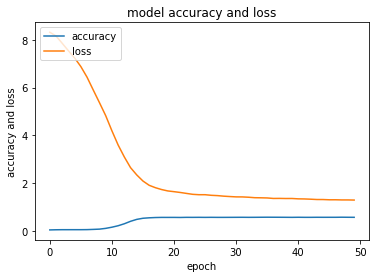

In [21]:
import matplotlib.pyplot as plt
plt.plot(model.history['accuracy'])
plt.plot(model.history['loss'])
plt.title('model accuracy and loss')
plt.ylabel('accuracy and loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc='upper left')
plt.show()

In [17]:
model.evaluate(X,y)

202/202 [==============================] - 5s 21ms/step - loss: 1.0062 - accuracy: 0.6544


[1.0062423944473267, 0.654449462890625]

In [19]:
model.save_weights("C:/Users/Admin/Downloads/nextword2.h5")
vocab_array = np.array(list(tokenizer.word_index.keys()))

# Importing the Libraries
from tensorflow.keras.models import load_model
import numpy as np
import pickle
# Load the model and tokenizer
model.load_weights("C:/Users/Admin/Downloads/nextword1.h5")
tokenizer = pickle.load(open("C:/Users/Admin/Downloads/tokenizer1.pkl", 'rb'))
def make_prediction(text, n_words):
    for i in range(n_words):
        text_tokenize = tokenizer.texts_to_sequences([text])
        text_padded = tf.keras.preprocessing.sequence.pad_sequences(text_tokenize, maxlen=14)
        prediction = np.squeeze(np.argmax(model.predict(text_padded), axis=-1))
        prediction = str(vocab_array[prediction - 1])
        print(vocab_array[np.argsort(model.predict(text_padded)) - 1].ravel()[:-3])
        text += " " + prediction
    return text

In [20]:
make_prediction("door",5)


1/1 [==============================] - 0s 60ms/step
['shock' 'delirium' 'me—something' ... 'pedant' 'fit' 'pleasant']
1/1 [==============================] - 0s 42ms/step
['neat' 'shock' 'me—something' ... 'pleasant' 'attendants' 'fit']
1/1 [==============================] - 0s 58ms/step
['shock' 'neat' 'me—something' ... 'been' 'fit' 'pleasant']
1/1 [==============================] - 0s 44ms/step
['against' 'shock' 'neat' ... 'volume' 'been' 'pleasant']
1/1 [==============================] - 0s 43ms/step
['against' 'shock' 'oration' ... 'looked' 'volume' 'forest']


'door moment door door door door'